## Overlap and coverage plots

In [1]:
def parse_species_file(file):
    lines = file.readlines()
    species_dict = {}
    for line in lines:
        line = line.rstrip()
        ncbi, name, uniprot_acc, source, refseq_acc = line.split('\t')
        species_dict[int(ncbi)] = name
    return species_dict

In [2]:
species_file = open('../../data/fDOG-assembly/species_set_benchmark_v2.tsv', 'r')
species_dict = parse_species_file(species_file)
species_file.close()
print(species_dict)

{45351: 'Nematostella vectensis', 10116: 'Rattus norvegicus', 9031: 'Gallus gallus', 8364: 'Xenopus tropicalis', 7955: 'Danio rerio', 7227: 'Drosophila melanogaster', 7070: 'Tribolium castaneum', 6945: 'Ixodes scapularis', 6412: 'Helobdella robusta', 6239: 'Caenorhabditis elegans'}


### BUSCO Augustus

   Species         GeneID                                transcript  overlap  \
0     6239  102804at33208  BX284601.5:10789087-10797610_r2.m1.g3.t1   1573.0   
1     6239  102804at33208  BX284601.5:10789087-10797610_r2.m1.g3.t1   3034.0   
2     6239  130245at33208    BX284601.5:6420887-6425669_r2.m1.g1.t1   2359.0   
3     6239   13816at33208    BX284601.5:8824397-8841505_r2.m1.g2.t1   8764.0   
4     6239   13816at33208    BX284601.5:8824397-8841505_r2.m1.g2.t1    948.0   

  uniprotID  coverage  
0    Q9N5R8  0.678602  
1    Q9N5R9  0.982831  
2    O01763  0.989929  
3    G5EDT9  0.995118  
4    Q65ZA8  1.000000  
                  Species         GeneID  \
0  Caenorhabditis elegans  102804at33208   
1  Caenorhabditis elegans  102804at33208   
2  Caenorhabditis elegans  130245at33208   
3  Caenorhabditis elegans   13816at33208   
4  Caenorhabditis elegans   13816at33208   

                                 transcript  overlap uniprotID  coverage  
0  BX284601.5:10789087-10797610_r2.

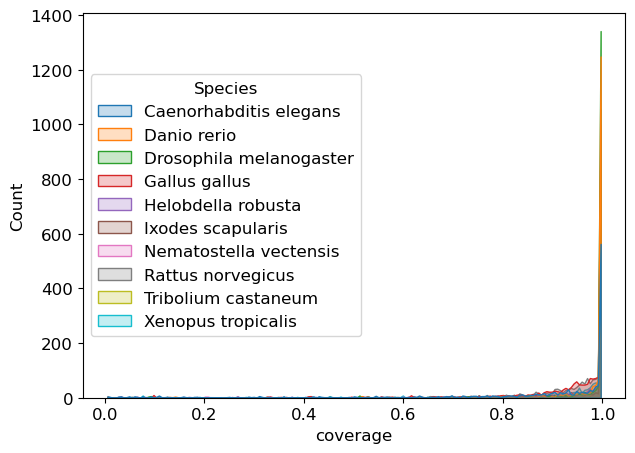

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

#sb.histplot(df_overlap, x="overlap", hue="Species", element="poly")
busco_augustus_df = pd.read_csv('../overlap_tables/busco_augustus_species_overlap_gff_files_gallus_v2.tsv', delimiter='\t')
print(busco_augustus_df.head())
busco_augustus_df.dropna(inplace=True)
busco_augustus_df['Species'].replace(species_dict, inplace=True) 
print(busco_augustus_df.head())

palette = sb.color_palette("tab10")
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.set_palette(palette)
sb.histplot(busco_augustus_df, x="coverage", hue="Species", element="poly", palette=palette)
sb.move_legend(ax, "center left")
#sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<AxesSubplot:xlabel='overlap', ylabel='Count'>

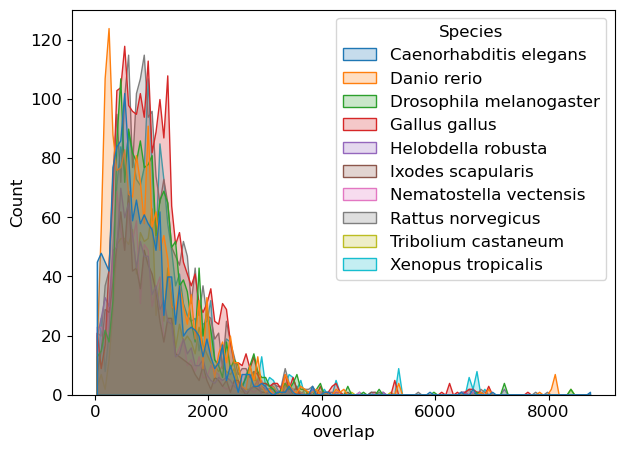

In [4]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(busco_augustus_df, x="overlap", hue="Species", element="poly", palette=palette)

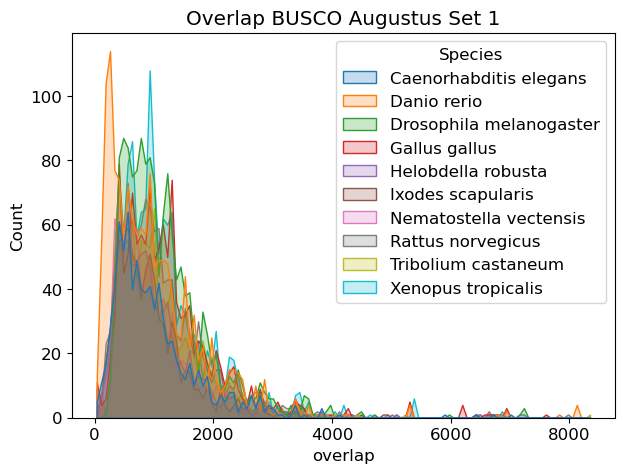

In [5]:
#max_df_b_a = busco_augustus_df.groupby(['Species', 'GeneID', 'transcript'], as_index=False)['coverage'].max()
max_values = busco_augustus_df.groupby(['Species', 'GeneID', 'transcript'])['coverage'].transform('max')
max_df_b_a = busco_augustus_df[busco_augustus_df['coverage'] == max_values]
#print(max_df_b_a.head())
#print(max_df_b_a.shape)
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(max_df_b_a, x="overlap", hue="Species", element="poly", palette=palette)
plt.title('Overlap BUSCO Augustus Set 1')
plt.savefig('overlap_plots/busco_augustus_overlap.png', dpi=900, bbox_inches='tight')

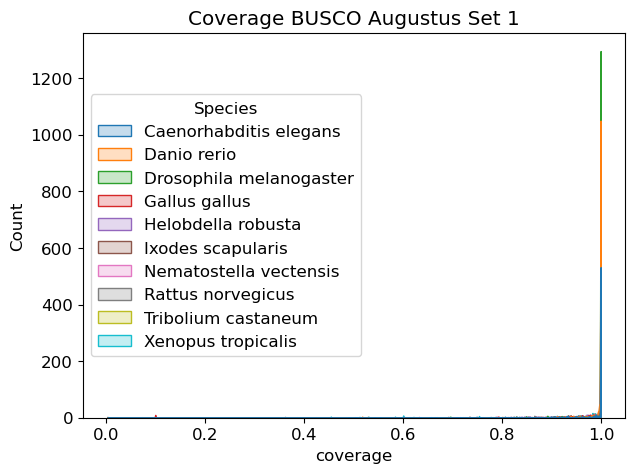

In [6]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(max_df_b_a, x="coverage", hue="Species", element="poly", palette=palette)
sb.move_legend(ax, "center left")
plt.title('Coverage BUSCO Augustus Set 1')
plt.savefig('overlap_plots/busco_augustus_coverage.png', dpi=900, bbox_inches='tight')

In [7]:
print(max_df_b_a.head())
print(max_df_b_a["Species"].value_counts())
print(max_df_b_a[max_df_b_a['coverage']>= 0.5]["Species"].value_counts())

                  Species         GeneID  \
1  Caenorhabditis elegans  102804at33208   
2  Caenorhabditis elegans  130245at33208   
4  Caenorhabditis elegans   13816at33208   
6  Caenorhabditis elegans  153034at33208   
7  Caenorhabditis elegans  158845at33208   

                                 transcript  overlap uniprotID  coverage  
1  BX284601.5:10789087-10797610_r2.m1.g3.t1   3034.0    Q9N5R9  0.982831  
2    BX284601.5:6420887-6425669_r2.m1.g1.t1   2359.0    O01763  0.989929  
4    BX284601.5:8824397-8841505_r2.m1.g2.t1    948.0    Q65ZA8  1.000000  
6  BX284601.5:13566396-13571914_r2.m1.g2.t1   1732.0    Q9U1Q3  1.000000  
7  BX284601.5:14631498-14642621_r2.m1.g1.t1   1015.0    Q7YTV2  1.000000  
Drosophila melanogaster    1486
Danio rerio                1484
Xenopus tropicalis         1382
Gallus gallus              1244
Rattus norvegicus          1183
Tribolium castaneum         967
Helobdella robusta          879
Nematostella vectensis      871
Caenorhabditis elegans      8

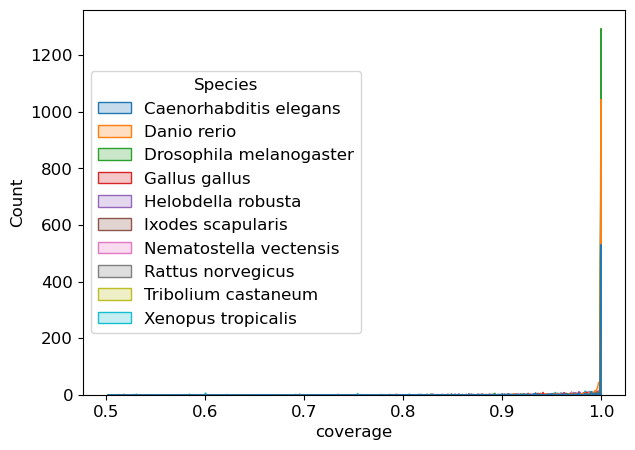

In [8]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(max_df_b_a[max_df_b_a['coverage']>= 0.5], x="coverage", hue="Species", element="poly", palette=palette)
sb.move_legend(ax, "center left")

<AxesSubplot:xlabel='overlap', ylabel='Count'>

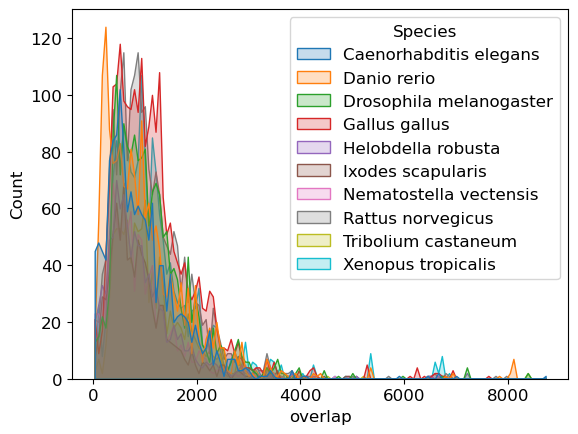

In [9]:
with_overlap = busco_augustus_df.dropna()
sb.histplot(with_overlap, x="overlap", hue="Species", element="poly", palette=palette)
#plt.xscale('log')

### BUSCO MetaEuk

   Species         GeneID                                         transcript  \
0     6239  446000at33208  446000at33208_6239_0:00007b|BX284601.5|+|55821...   
1     6239  446000at33208  446000at33208_6239_0:000685|BX284601.5|+|49019...   
2     6239  642773at33208  642773at33208_6239_0:000102|BX284601.5|+|74923...   
3     6239  357580at33208  357580at33208_6239_0:00073f|BX284601.5|+|41932...   
4     6239  603370at33208  603370at33208_6239_0:000148|BX284601.5|-|83291...   

   overlap uniprotID  coverage  
0    631.0    P91402  0.718679  
1    870.0    P91266  0.987514  
2    310.0    Q22850  0.990415  
3    956.0    O02097  0.971545  
4    431.0    Q20647  0.990805  


/tmp/ipykernel_1772923/2432297434.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  busco_metaeuk_df['Species'].replace(species_dict, inplace=True)


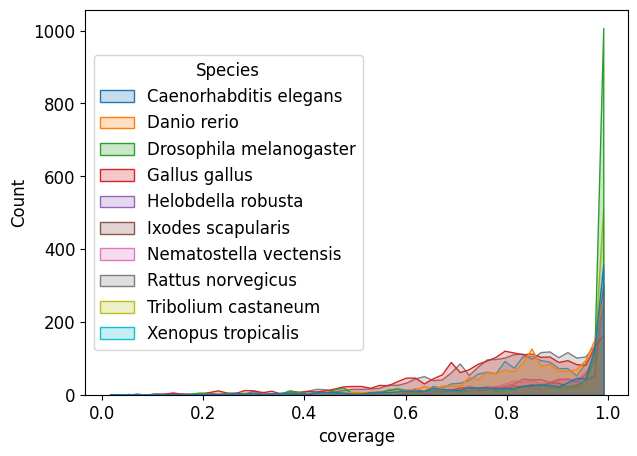

In [81]:
busco_metaeuk_df = pd.read_csv('../overlap_tables/busco_metaeuk_overlap_gff_files_gallus_2.tsv', delimiter='\t')
print(busco_metaeuk_df.head())
busco_metaeuk_df['Species'].replace(species_dict, inplace=True) 

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(busco_metaeuk_df, x="coverage", hue="Species", element="poly", palette=palette)
sb.move_legend(ax, "center left")

<Axes: xlabel='overlap', ylabel='Count'>

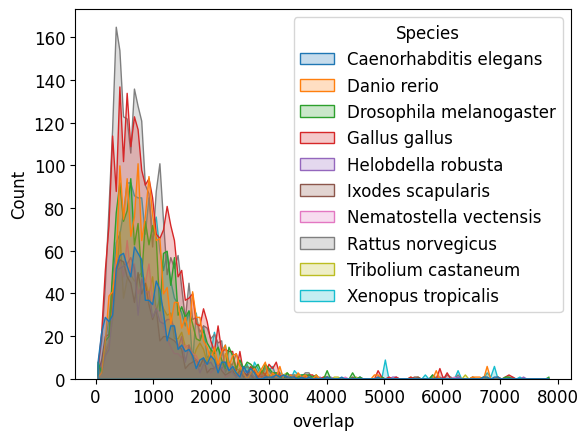

In [82]:
sb.histplot(busco_metaeuk_df, x="overlap", hue="Species", element="poly", palette=palette)

                  Species         GeneID  \
0  Caenorhabditis elegans  446000at33208   
1  Caenorhabditis elegans  446000at33208   
2  Caenorhabditis elegans  642773at33208   
3  Caenorhabditis elegans  357580at33208   
4  Caenorhabditis elegans  603370at33208   

                                          transcript  overlap uniprotID  \
0  446000at33208_6239_0:00007b|BX284601.5|+|55821...    631.0    P91402   
1  446000at33208_6239_0:000685|BX284601.5|+|49019...    870.0    P91266   
2  642773at33208_6239_0:000102|BX284601.5|+|74923...    310.0    Q22850   
3  357580at33208_6239_0:00073f|BX284601.5|+|41932...    956.0    O02097   
4  603370at33208_6239_0:000148|BX284601.5|-|83291...    431.0    Q20647   

   coverage  
0  0.718679  
1  0.987514  
2  0.990415  
3  0.971545  
4  0.990805  
(10548, 6)


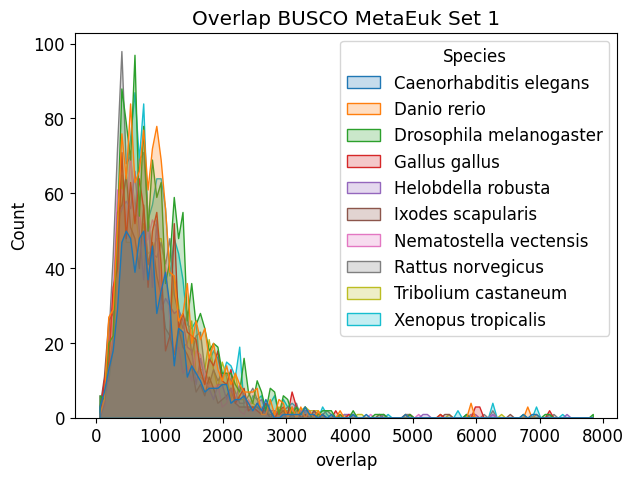

In [83]:
max_values = busco_metaeuk_df.groupby(['Species', 'GeneID', 'transcript'])['coverage'].transform('max')
max_df_b_m = busco_metaeuk_df[busco_metaeuk_df['coverage'] == max_values]
print(max_df_b_m.head())
print(max_df_b_m.shape)
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(max_df_b_m, x="overlap", hue="Species", element="poly", palette=palette)

plt.title('Overlap BUSCO MetaEuk Set 1')
plt.savefig('overlap_plots/busco_metaeuk_overlap.png', dpi=900, bbox_inches='tight')

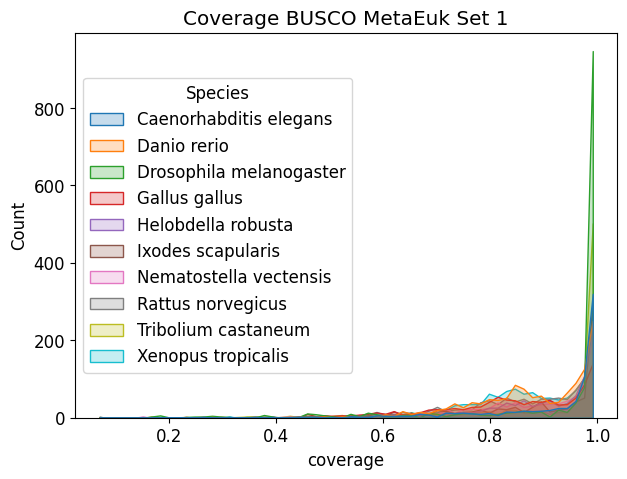

In [84]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(max_df_b_m, x="coverage", hue="Species", element="poly", palette=palette)
sb.move_legend(ax, "center left")
plt.title('Coverage BUSCO MetaEuk Set 1')
plt.savefig('overlap_plots/busco_metaeuk_coverage.png', dpi=900, bbox_inches='tight')

### fDOG-Assembly Augustus

/tmp/ipykernel_1772923/206742177.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fa_augustus_df['Species'].replace(species_dict, inplace=True)


<Axes: xlabel='coverage', ylabel='Count'>

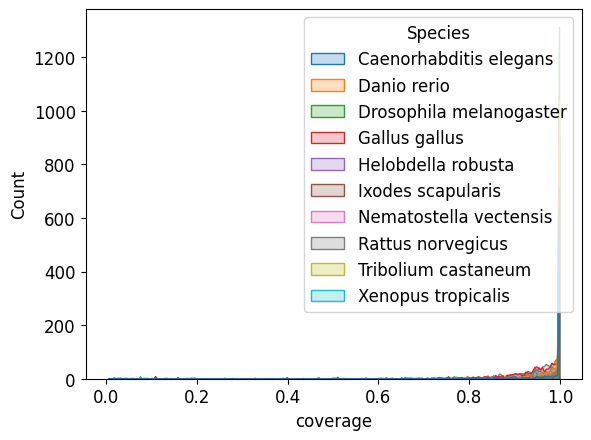

In [85]:
fa_augustus_df = pd.read_csv('../overlap_tables/fdog_ass_busco_augustus_overlap_gff_files_gallus_v2.tsv', delimiter='\t')
fa_augustus_df['Species'].replace(species_dict, inplace=True)
#print(fa_augustus_df.head())
sb.histplot(fa_augustus_df.sort_values(by=['Species']), x="coverage", hue="Species", element="poly", palette=palette)

<Axes: xlabel='overlap', ylabel='Count'>

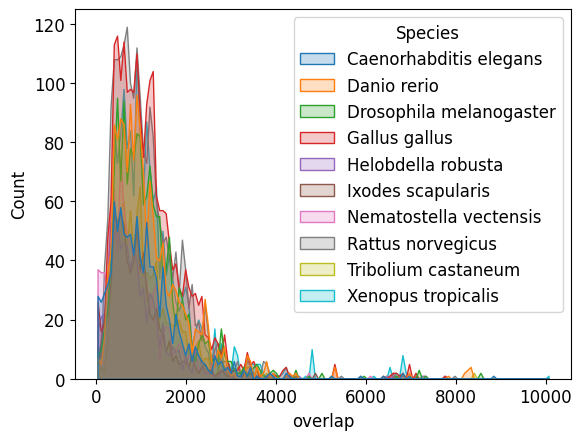

In [86]:
sb.histplot(fa_augustus_df.sort_values(by=['Species']), x="overlap", hue="Species", element="poly", palette=palette)

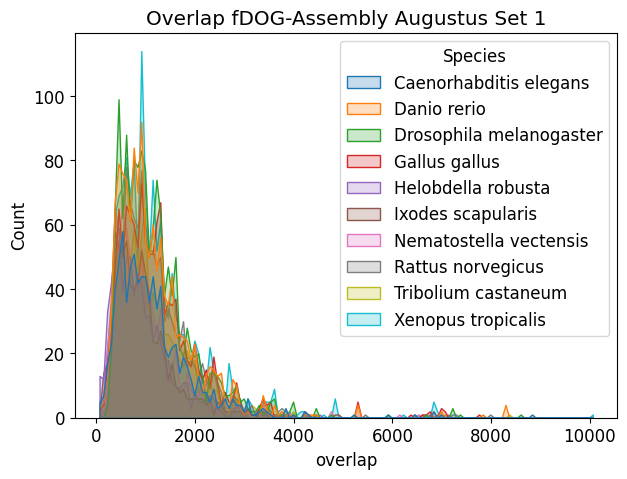

In [87]:
max_values = fa_augustus_df.groupby(['Species', 'GeneID', 'transcript'])['coverage'].transform('max')
max_df_fa_a = fa_augustus_df[fa_augustus_df['coverage'] == max_values]
#print(max_df_fa_a.head())
#print(max_df_fa_a.shape)
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(max_df_fa_a.sort_values(by=['Species']), x="overlap", hue="Species", element="poly", palette=palette)
plt.title('Overlap fDOG-Assembly Augustus Set 1')
plt.savefig('overlap_plots/fa_augustus_overlap.png', dpi=900, bbox_inches='tight')

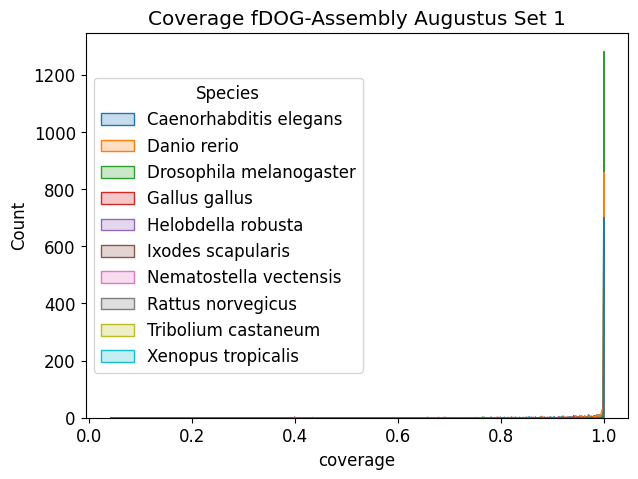

In [88]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(max_df_fa_a.sort_values(by=['Species']), x="coverage", hue="Species", element="poly", palette=palette)
plt.title('Coverage fDOG-Assembly Augustus Set 1')
sb.move_legend(ax, "center left")
plt.savefig('overlap_plots/fa_augustus_coverage.png', dpi=900, bbox_inches='tight')

In [89]:
#get NEMVE genes too low overlap:
print(max_df_fa_a[(max_df_fa_a['coverage']< 0.5) & (max_df_fa_a['Species'] == 45351)])


Empty DataFrame
Columns: [Species, GeneID, transcript, overlap, uniprotID, coverage]
Index: []


### fDOG-Assembly MetaEuk

   Species         GeneID                         transcript  overlap  \
0     6239  503333at33208  503333at33208_BX284603.4_1_2_mRNA    890.0   
1     6239   14776at33208   14776at33208_BX284603.4_1_1_mRNA   6930.0   
2     6239  235458at33208  235458at33208_BX284603.4_1_2_mRNA   1310.0   
3     6239  235458at33208  235458at33208_BX284603.4_1_2_mRNA   1310.0   
4     6239  625769at33208  625769at33208_BX284603.4_1_1_mRNA    911.0   

  uniprotID  coverage  
0    P46577  0.839623  
1    B3CJ34  0.906238  
2    Q45EK7  0.766530  
3    Q45EK7  0.778835  
4    Q9U226  0.985931  


/tmp/ipykernel_1772923/3137169001.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fa_metaeuk_df['Species'].replace(species_dict, inplace=True)


<Axes: xlabel='coverage', ylabel='Count'>

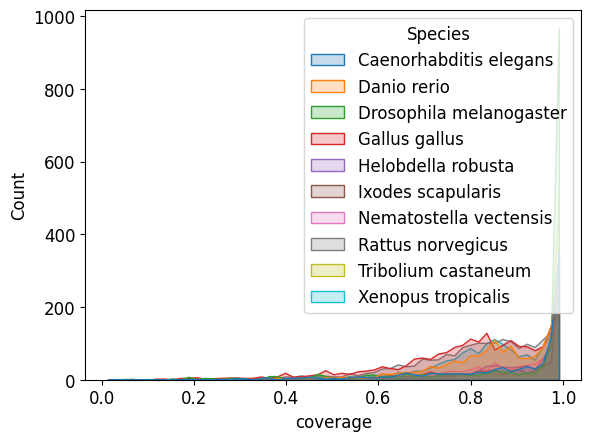

In [90]:
fa_metaeuk_df = pd.read_csv('../overlap_tables/fdog_ass_busco_metaeuk_overlap_gff_files_gallus_v2.tsv', delimiter='\t')
print(fa_metaeuk_df.head())
fa_metaeuk_df['Species'].replace(species_dict, inplace=True)

sb.histplot(fa_metaeuk_df.sort_values(by=['Species']), x="coverage", hue="Species", element="poly", palette=palette)

#plt.title('Coverage fDOG-Assembly MetaEuk')
#plt.savefig('fa_metaeuk_coverage.png', dpi=900, bbox_inches='tight')

<Axes: xlabel='overlap', ylabel='Count'>

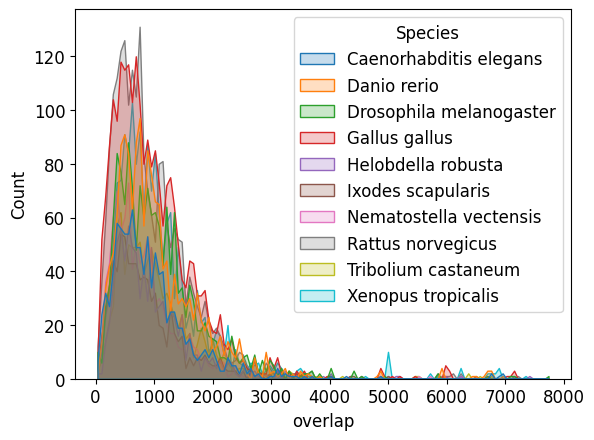

In [91]:
sb.histplot(fa_metaeuk_df.sort_values(by=['Species']), x="overlap", hue="Species", element="poly", palette=palette)
#plt.title('Overlap fDOG-Assembly MetaEuk')
#plt.savefig('fa_metaeuk_overlap.png', dpi=900, bbox_inches='tight')

                  Species         GeneID                         transcript  \
0  Caenorhabditis elegans  503333at33208  503333at33208_BX284603.4_1_2_mRNA   
1  Caenorhabditis elegans   14776at33208   14776at33208_BX284603.4_1_1_mRNA   
3  Caenorhabditis elegans  235458at33208  235458at33208_BX284603.4_1_2_mRNA   
5  Caenorhabditis elegans  625769at33208  625769at33208_BX284603.4_1_1_mRNA   
6  Caenorhabditis elegans  631662at33208  631662at33208_BX284603.4_1_6_mRNA   

   overlap uniprotID  coverage  
0    890.0    P46577  0.839623  
1   6930.0    B3CJ34  0.906238  
3   1310.0    Q45EK7  0.778835  
5   1009.0    Q9U226  0.990186  
6    310.0    P49181  0.990415  
(10397, 6)


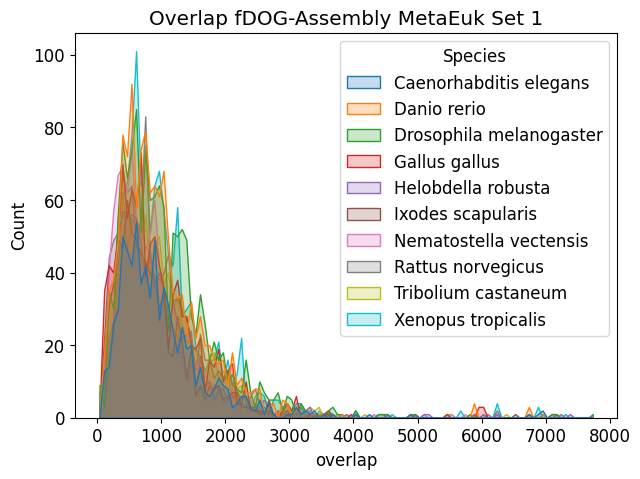

In [92]:
max_values = fa_metaeuk_df.groupby(['Species', 'GeneID', 'transcript'])['coverage'].transform('max')
max_df_fa_m = fa_metaeuk_df[fa_metaeuk_df['coverage'] == max_values]
print(max_df_fa_m.head())
print(max_df_fa_m.shape)
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(max_df_fa_m.sort_values(by=['Species']), x="overlap", hue="Species", element="poly", palette=palette)
plt.title('Overlap fDOG-Assembly MetaEuk Set 1')
plt.savefig('overlap_plots/fa_metaeuk_overlap.png', dpi=900, bbox_inches='tight')

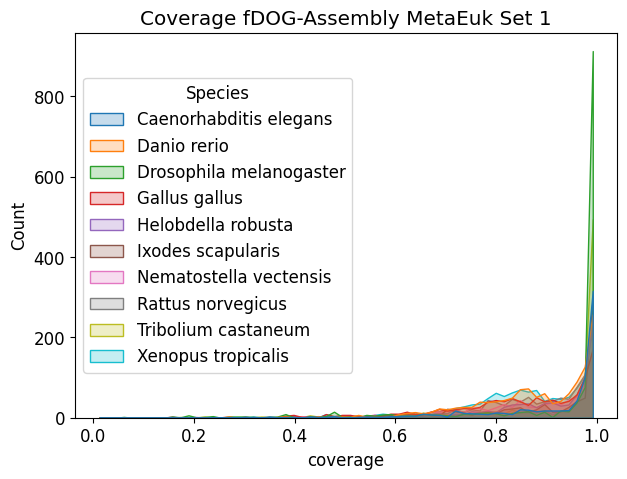

In [93]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(max_df_fa_m.sort_values(by=['Species']), x="coverage", hue="Species", element="poly", palette=palette)
plt.title('Coverage fDOG-Assembly MetaEuk Set 1')
sb.move_legend(ax, "center left")
plt.savefig('overlap_plots/fa_metaeuk_coverage.png', dpi=900, bbox_inches='tight')

In [94]:
display(max_df_fa_m)

,Species,GeneID,transcript,overlap,uniprotID,coverage
0,Caenorhabditis elegans,503333at33208,503333at33208_BX284603.4_1_2_mRNA,890.0,P46577,0.839623
1,Caenorhabditis elegans,14776at33208,14776at33208_BX284603.4_1_1_mRNA,6930.0,B3CJ34,0.906238
3,Caenorhabditis elegans,235458at33208,235458at33208_BX284603.4_1_2_mRNA,1310.0,Q45EK7,0.778835
5,Caenorhabditis elegans,625769at33208,625769at33208_BX284603.4_1_1_mRNA,1009.0,Q9U226,0.990186
6,Caenorhabditis elegans,631662at33208,631662at33208_BX284603.4_1_6_mRNA,310.0,P49181,0.990415
...,...,...,...,...,...,...
14406,Rattus norvegicus,338191at33208,338191at33208_CM026990.1_1_1_mRNA,1745.0,A0A8I6ADM2,0.921331
14412,Rattus norvegicus,522886at33208,522886at33208_CM026990.1_1_1_mRNA,1000.0,F7FM32,0.996016
14415,Rattus norvegicus,535524at33208,535524at33208_CM026990.1_1_1_mRNA,385.0,A0A8I6AR57,0.962500
14419,Rattus norvegicus,103854at33208,103854at33208_CM026990.1_1_1_mRNA,2064.0,A0A8I6AQ35,0.836644


In [95]:
max_df_fa_m[max_df_fa_m['coverage'] < 0.5 ].count() 

Species       318
GeneID        318
transcript    318
overlap       318
uniprotID     298
coverage      318
dtype: int64

In [96]:
max_df_fa_a[max_df_fa_a['coverage'] < 0.5 ].count() 

Species       91
GeneID        91
transcript    91
overlap       91
uniprotID     80
coverage      91
dtype: int64

In [97]:
max_df_b_m[max_df_b_m['coverage'] < 0.5 ].count() 

Species       286
GeneID        286
transcript    286
overlap       286
uniprotID     286
coverage      286
dtype: int64

In [98]:
max_df_b_a[max_df_b_a['coverage'] < 0.5 ].count() 

Species       122
GeneID        122
transcript    122
overlap       122
uniprotID     122
coverage      122
dtype: int64

## Compleasm

   Species         GeneID                                         transcript  \
0     6239  102804at33208  102804at33208_10224_0:00116b|BX284601.5:107891...   
1     6239  130245at33208  130245at33208_123851_0:000233|BX284601.5:64221...   
2     6239   13816at33208  13816at33208_10224_0:00365f|BX284601.5:8828420...   
3     6239  153034at33208  153034at33208_10228_0:0013db|BX284601.5:135664...   
4     6239  158845at33208  158845at33208_51031_0:000d3d|BX284601.5:146346...   

   overlap uniprotID  coverage  
0   3066.0    Q9N5R9  1.000000  
1   1435.0    O01763  0.999304  
2   7256.0    G5EDT9  0.942215  
3   1819.0    Q9U1Q3  1.000000  
4    961.0    Q7YTV2  0.946798  


<AxesSubplot:xlabel='coverage', ylabel='Count'>

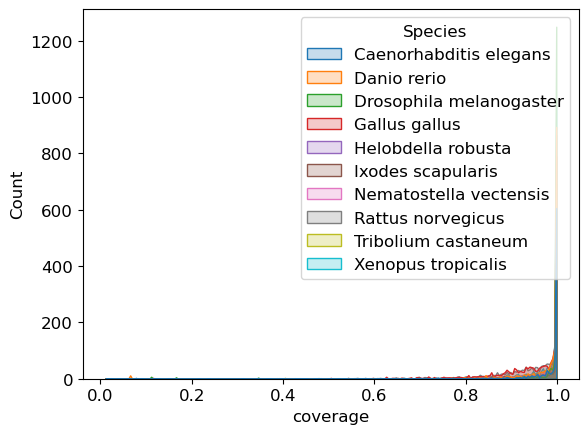

In [11]:
compleasm_df = pd.read_csv('../overlap_tables/compleasm_overlap_gff_files_gallus_v2.tsv', delimiter='\t')
print(compleasm_df.head())
compleasm_df['Species'].replace(species_dict, inplace=True)

sb.histplot(compleasm_df.sort_values(by=['Species']), x="coverage", hue="Species", element="poly", palette=palette)

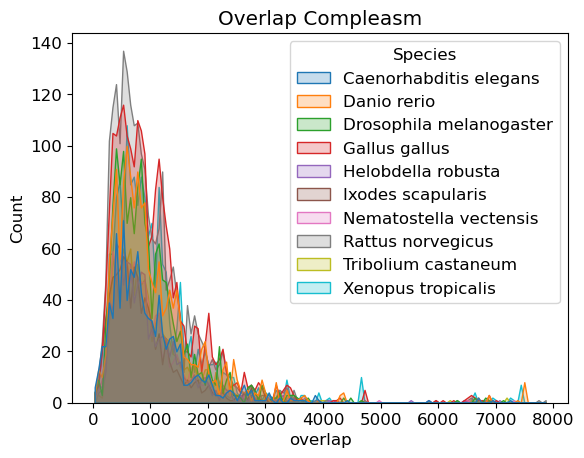

In [12]:
sb.histplot(compleasm_df.sort_values(by=['Species']), x="overlap", hue="Species", element="poly", palette=palette)
plt.title('Overlap Compleasm')
plt.savefig('compleasm_overlap.png', dpi=900, bbox_inches='tight')

                  Species         GeneID  \
0  Caenorhabditis elegans  102804at33208   
1  Caenorhabditis elegans  130245at33208   
2  Caenorhabditis elegans   13816at33208   
3  Caenorhabditis elegans  153034at33208   
5  Caenorhabditis elegans  158845at33208   

                                          transcript  overlap uniprotID  \
0  102804at33208_10224_0:00116b|BX284601.5:107891...   3066.0    Q9N5R9   
1  130245at33208_123851_0:000233|BX284601.5:64221...   1435.0    O01763   
2  13816at33208_10224_0:00365f|BX284601.5:8828420...   7256.0    G5EDT9   
3  153034at33208_10228_0:0013db|BX284601.5:135664...   1819.0    Q9U1Q3   
5  158845at33208_51031_0:000d3d|BX284601.5:146346...   1999.0    Q95Q35   

   coverage  
0  1.000000  
1  0.999304  
2  0.942215  
3  1.000000  
5  0.979422  
(11488, 6)


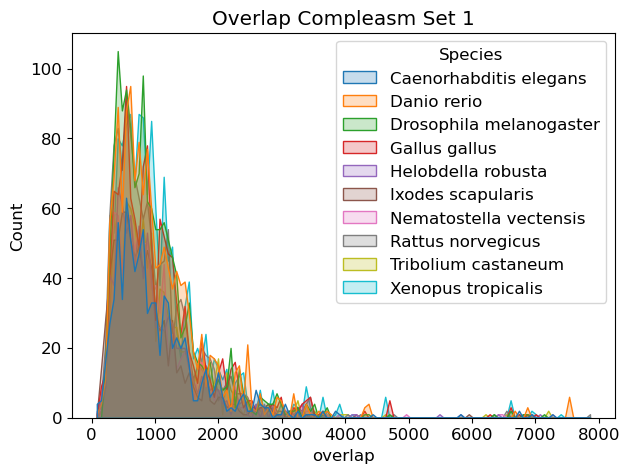

In [13]:
max_values = compleasm_df.groupby(['Species', 'GeneID', 'transcript'])['coverage'].transform('max')
max_df_c = compleasm_df[compleasm_df['coverage'] == max_values]
print(max_df_c.head())
print(max_df_c.shape)
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(max_df_c.sort_values(by=['Species']), x="overlap", hue="Species", element="poly", palette=palette)
plt.title('Overlap Compleasm Set 1')
plt.savefig('overlap_plots/compleasm_overlap.png', dpi=900, bbox_inches='tight')

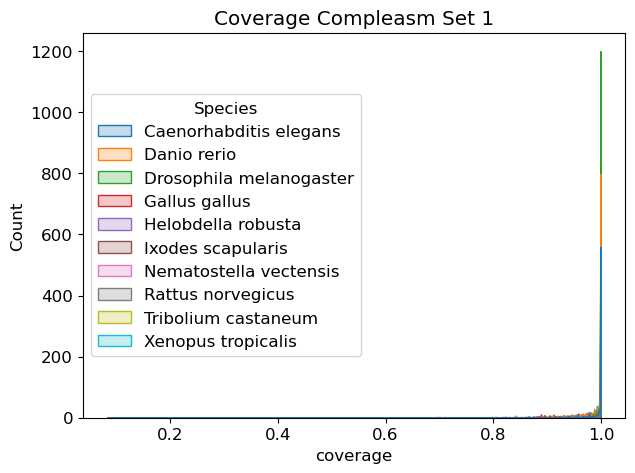

In [14]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(max_df_c.sort_values(by=['Species']), x="coverage", hue="Species", element="poly", palette=palette)
plt.title('Coverage Compleasm Set 1')
sb.move_legend(ax, "center left")
plt.savefig('overlap_plots/compleasm_coverage.png', dpi=900, bbox_inches='tight')

## Human Proteom

   Species  GeneID                 transcript  overlap uniprotID  coverage
0    45351  P54577  P54577_DS469824_1_1_g2.t1   1455.0    A7SV20  0.922638
1    45351  P55196  P55196_DS469824_1_1_g1.t1   2941.0    A7SV25  0.771713
2    45351  P55196  P55196_DS469824_1_1_g1.t1   2853.0    A7SV26  0.800281
3    45351  Q8IYE0  Q8IYE0_DS469508_1_1_g2.t1     34.0    A7RFV7  0.100592
4    45351  Q8IYE0  Q8IYE0_DS469508_1_1_g2.t1   2774.0    A7RFV9  0.981252


/tmp/ipykernel_1772923/4288336221.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fa_augustus_df['Species'].replace(species_dict, inplace=True)
/tmp/ipykernel_1772923/4288336221.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sb.histplot(fa_augustus_df.sort_values(by=['Species']), x="coverage", hue="Species", element="poly", palette=palette)


<Axes: xlabel='coverage', ylabel='Count'>

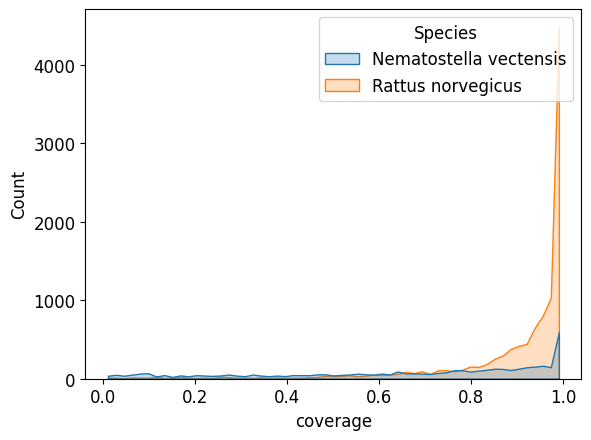

In [99]:
fa_augustus_df = pd.read_csv('../overlap_tables/fdog_ass_human_proteom_augustus_overlap_gff_files_rat_nema_5t.tsv', delimiter='\t')
print(fa_augustus_df.head())
fa_augustus_df['Species'].replace(species_dict, inplace=True)

sb.histplot(fa_augustus_df.sort_values(by=['Species']), x="coverage", hue="Species", element="poly", palette=palette)

/tmp/ipykernel_1772923/1023111540.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sb.histplot(fa_augustus_df.sort_values(by=['Species']), x="overlap", hue="Species", element="poly", palette=palette)


<Axes: xlabel='overlap', ylabel='Count'>

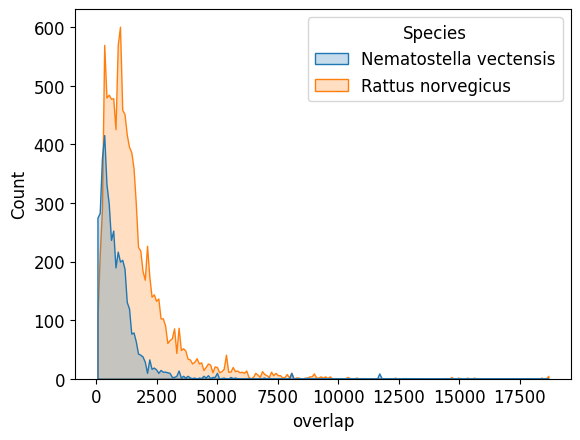

In [100]:
sb.histplot(fa_augustus_df.sort_values(by=['Species']), x="overlap", hue="Species", element="poly", palette=palette)

/tmp/ipykernel_1772923/4020308737.py:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sb.histplot(max_df_fa_a.sort_values(by=['Species']), x="overlap", hue="Species", element="poly", palette=palette)


                  Species  GeneID                 transcript  overlap  \
0  Nematostella vectensis  P54577  P54577_DS469824_1_1_g2.t1   1455.0   
2  Nematostella vectensis  P55196  P55196_DS469824_1_1_g1.t1   2853.0   
4  Nematostella vectensis  Q8IYE0  Q8IYE0_DS469508_1_1_g2.t1   2774.0   
5  Nematostella vectensis  Q9P246  Q9P246_DS469508_1_1_g2.t1    651.0   
6  Nematostella vectensis  O94812  O94812_DS469508_1_1_g2.t1    662.0   

  uniprotID  coverage  
0    A7SV20  0.922638  
2    A7SV26  0.800281  
4    A7RFV9  0.981252  
5    A7RFY6  0.571554  
6    A7RFY4  0.651575  
(9462, 6)


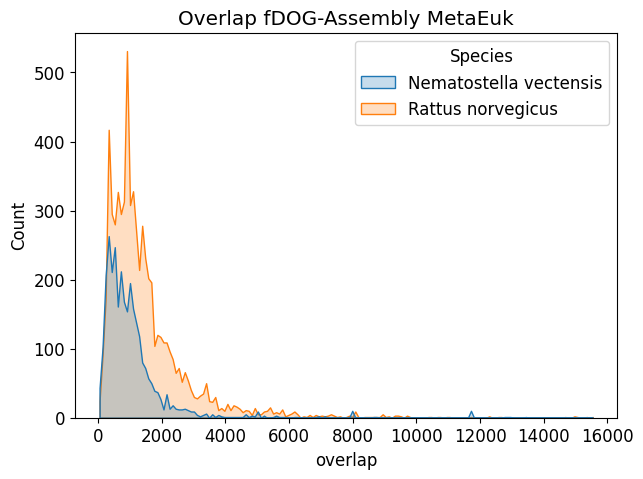

In [101]:
max_values = fa_augustus_df.groupby(['Species', 'GeneID', 'transcript'])['coverage'].transform('max')
max_df_fa_a = fa_augustus_df[fa_augustus_df['coverage'] == max_values]
print(max_df_fa_a.head())
print(max_df_fa_a.shape)
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(max_df_fa_a.sort_values(by=['Species']), x="overlap", hue="Species", element="poly", palette=palette)
plt.title('Overlap fDOG-Assembly MetaEuk')
plt.savefig('overlap_plots/fa_augustus_human_proteom_overlap.png', dpi=900, bbox_inches='tight')

/tmp/ipykernel_1772923/3889682094.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sb.histplot(max_df_fa_a.sort_values(by=['Species']), x="coverage", hue="Species", element="poly", palette=palette)


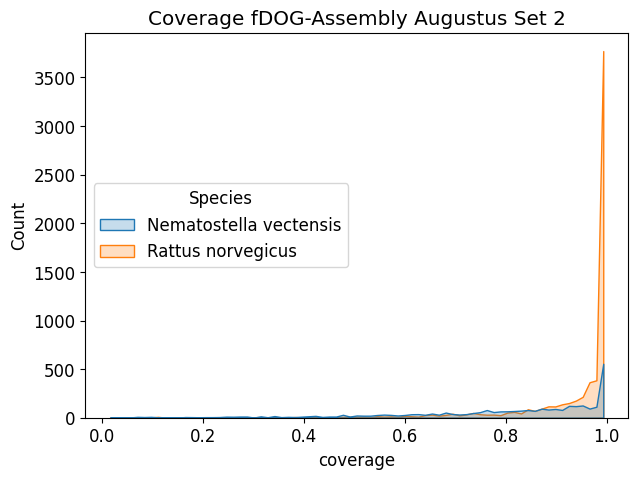

In [102]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(max_df_fa_a.sort_values(by=['Species']), x="coverage", hue="Species", element="poly", palette=palette)
plt.title('Coverage fDOG-Assembly Augustus Set 2')
sb.move_legend(ax, "center left")
plt.savefig('overlap_plots/fa_augustus_human_proteom_coverage.png', dpi=900, bbox_inches='tight')

## fDA MetaEuk sens

   Species  GeneID                  transcript  overlap   uniprotID  coverage
0    10116  P61009  P61009_CM026989.1_1_5_mRNA    357.0  A0A8I6A2B6  0.681298
1    10116  P61009  P61009_CM026989.1_1_5_mRNA    200.0  A0A8I6A2B6  0.400000
2    10116  Q8NHS2  Q8NHS2_CM026989.1_1_9_mRNA    602.0      Q6AY54  0.545290
3    10116  Q8NHS2  Q8NHS2_CM026989.1_1_9_mRNA    463.0      Q6AY54  0.492553
4    10116  Q8NHS2  Q8NHS2_CM026989.1_1_9_mRNA    463.0      Q6AY54  0.429898


/tmp/ipykernel_1772923/2445622132.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fa_metaeuk_df['Species'].replace(species_dict, inplace=True)
/tmp/ipykernel_1772923/2445622132.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sb.histplot(fa_metaeuk_df.sort_values(by=['Species']), x="coverage", hue="Species", element="poly", palette=palette)


<Axes: xlabel='coverage', ylabel='Count'>

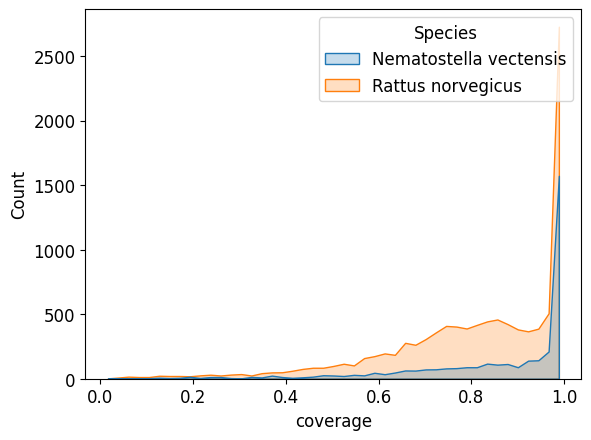

In [103]:
fa_metaeuk_df = pd.read_csv('../overlap_tables/fdog_ass_human_proteom_metaeuk_sens_overlap_gff_files_rat_nema_5t.tsv', delimiter='\t')
print(fa_metaeuk_df.head())
fa_metaeuk_df['Species'].replace(species_dict, inplace=True)

sb.histplot(fa_metaeuk_df.sort_values(by=['Species']), x="coverage", hue="Species", element="poly", palette=palette)

/tmp/ipykernel_1772923/1499103963.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sb.histplot(fa_metaeuk_df.sort_values(by=['Species']), x="overlap", hue="Species", element="poly", palette=palette)


<Axes: xlabel='overlap', ylabel='Count'>

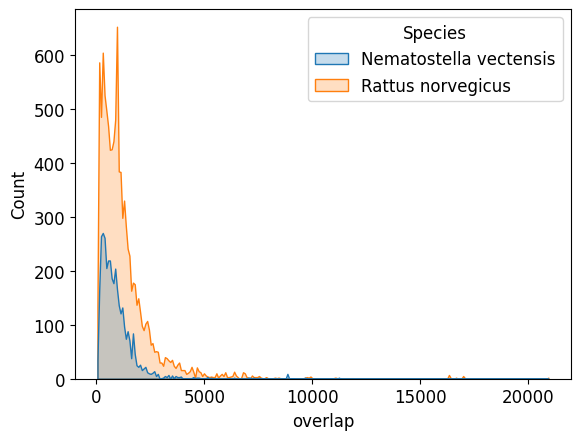

In [104]:
sb.histplot(fa_metaeuk_df.sort_values(by=['Species']), x="overlap", hue="Species", element="poly", palette=palette)

/tmp/ipykernel_1772923/2402652157.py:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sb.histplot(max_df_fa_m.sort_values(by=['Species']), x="overlap", hue="Species", element="poly", palette=palette)


             Species  GeneID                   transcript  overlap  \
0  Rattus norvegicus  P61009   P61009_CM026989.1_1_5_mRNA    357.0   
2  Rattus norvegicus  Q8NHS2   Q8NHS2_CM026989.1_1_9_mRNA    602.0   
5  Rattus norvegicus  Q9BYU1  Q9BYU1_CM026989.1_1_11_mRNA   1030.0   
7  Rattus norvegicus  Q02543   Q02543_CM026989.1_1_4_mRNA    321.0   
9  Rattus norvegicus  P11362  P11362_CM026989.1_1_17_mRNA   1543.0   

    uniprotID  coverage  
0  A0A8I6A2B6  0.681298  
2      Q6AY54  0.545290  
5      D4AA41  0.990385  
7  A0A8I6AM85  0.634387  
9      F1LM54  0.739339  
(9988, 6)


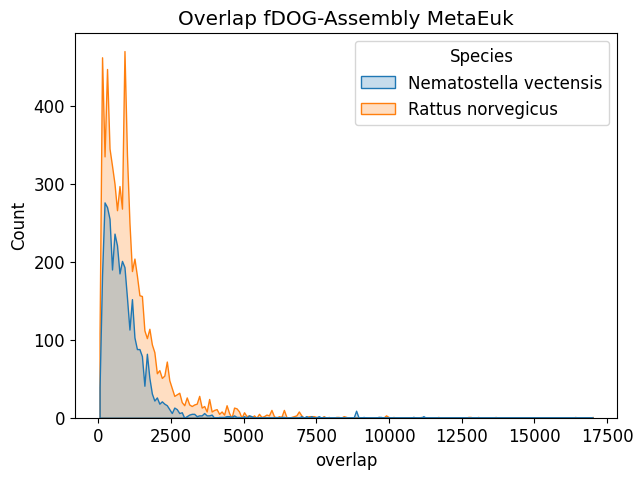

In [105]:
max_values = fa_metaeuk_df.groupby(['Species', 'GeneID', 'transcript'])['coverage'].transform('max')
max_df_fa_m = fa_metaeuk_df[fa_metaeuk_df['coverage'] == max_values]
print(max_df_fa_m.head())
print(max_df_fa_m.shape)
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(max_df_fa_m.sort_values(by=['Species']), x="overlap", hue="Species", element="poly", palette=palette)
plt.title('Overlap fDOG-Assembly MetaEuk')
plt.savefig('overlap_plots/fa_metaeuk_sens_human_proteom_overlap.png', dpi=900, bbox_inches='tight')

/tmp/ipykernel_1772923/104403602.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sb.histplot(max_df_fa_m.sort_values(by=['Species']), x="coverage", hue="Species", element="poly", palette=palette)


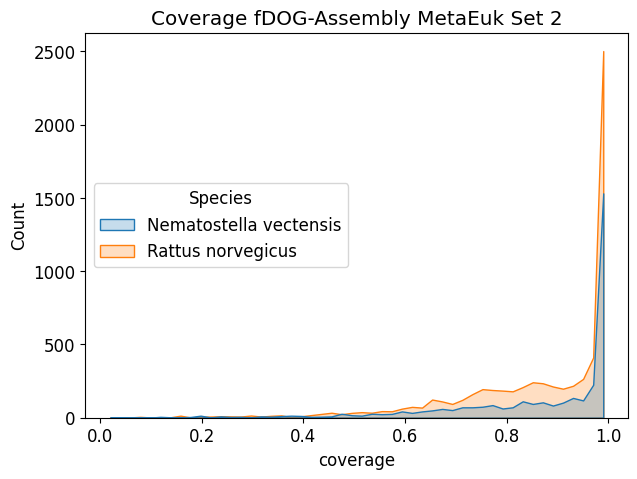

In [106]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7, 5))
sb.histplot(max_df_fa_m.sort_values(by=['Species']), x="coverage", hue="Species", element="poly", palette=palette)
plt.title('Coverage fDOG-Assembly MetaEuk Set 2')
sb.move_legend(ax, "center left")
plt.savefig('overlap_plots/fa_metaeuk_sens_human_proteom_coverage.png', dpi=900, bbox_inches='tight')